In [169]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cisc-873-dm-w24-a2/Speed Dating Data Description.pdf
/kaggle/input/cisc-873-dm-w24-a2/train.csv
/kaggle/input/cisc-873-dm-w24-a2/test.csv


In [170]:
pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [171]:
# import libraries
import pandas as pd 
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import PredefinedSplit
from xgboost.sklearn import XGBClassifier
from skopt import BayesSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

In [172]:
#read the traing and test data 
df2=pd.read_csv('/kaggle/input/cisc-873-dm-w24-a2/test.csv')
df=pd.read_csv("/kaggle/input/cisc-873-dm-w24-a2/train.csv")
df

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,3,2,14,18,2,2.0,14,12,372.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2583
1,1,14,1,3,10,2,NaN,8,8,63.0,...,8.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,6830
2,1,14,1,13,10,8,8.0,10,10,331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4840
3,1,38,2,9,20,18,13.0,6,7,200.0,...,9.0,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,5508
4,1,24,2,14,20,6,6.0,20,17,357.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5904,0,1,2,9,20,2,2.0,18,1,214.0,...,12.0,12.0,9.0,12.0,NaN,NaN,NaN,NaN,NaN,3390
5905,1,24,2,9,20,19,15.0,5,6,199.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4130
5906,0,13,2,11,21,5,5.0,3,18,290.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1178
5907,1,10,2,7,16,6,14.0,9,10,151.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5016


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Columns: 192 entries, gender to id
dtypes: float64(173), int64(11), object(8)
memory usage: 8.7+ MB


In [174]:
# description of the dataset 
df.describe()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
count,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,4591.000000,5909.00000,5909.000000,5901.000000,...,2804.000000,2804.000000,2804.000000,2804.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,5909.000000
mean,0.505331,17.360298,1.824843,11.347436,16.850228,9.001523,9.254846,8.91166,8.962938,283.733266,...,8.105563,8.377318,7.644437,7.398716,6.799717,7.631989,7.944798,7.162774,7.092711,4191.314943
std,0.500014,10.947542,0.380133,6.011495,4.389246,5.482368,5.611803,5.45710,5.500706,158.993002,...,1.601011,1.459013,1.757559,1.956924,1.535768,1.498024,1.320919,1.687431,1.713729,2408.009173
min,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000,0.000000
25%,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.00000,4.000000,153.000000,...,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000,2124.000000
50%,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.00000,8.000000,280.000000,...,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000,4210.000000
75%,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.00000,13.000000,409.000000,...,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000,6266.000000
max,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.00000,22.000000,552.000000,...,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8372.000000


In [175]:
df.columns

Index(['gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1',
       'order', 'partner', 'pid',
       ...
       'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3', 'sinc5_3',
       'intel5_3', 'fun5_3', 'amb5_3', 'id'],
      dtype='object', length=192)

In [176]:
# target column
df['match'].unique()

array([0, 1])

In [177]:
# delete the id column and then check for duplicates
del df['id']
# check if the dataset has duplicate values
df.duplicated().sum()

0

In the data description, there are interest scores ranging from 1 to 10.let's see if we have outliers or not 

In [178]:
interests=['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',\
           'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy']

In [179]:
# unique value of interests
df[interests].nunique()

sports      10
tvsports    10
exercise    10
dining      10
museums     11
art         11
hiking      11
gaming      12
clubbing    11
reading     11
tv          10
theater     11
movies      10
concerts    11
music       10
shopping    10
yoga        11
exphappy    10
dtype: int64

we should have a 10 unique values ,i will see if we have outliers or null values and handle it 

In [180]:
# categorical features
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['field', 'undergra', 'mn_sat', 'tuition', 'from', 'zipcode', 'income',
       'career'],
      dtype='object')

In [181]:
# let's check the unique values of this column
df['from'].unique()

array(['Palo Alto, CA', 'Boston, MA', 'Bombay, India', 'Washington, DC',
       'Midwest USA', 'San Francisco', 'India/Venezuela', 'new york city',
       'Maryland', 'Arizona', 'Brooklyn, NY', 'India', 'Siberia', 'china',
       'UK', 'Spain', 'New Jersey', 'New York', 'Texas', 'Atlanta',
       'New York Area/ New Jersey', 'Ohio', 'Greenwich, CT',
       'Tokyo, Japan', 'Canada', 'California (West Coast)', 'Vestal',
       'France', 'California', 'NY', 'Seattle', 'Yugoslavia',
       'Northern New Jersey', 'Albuquerque, NM', 'Austin, TX',
       'New Mexico', 'Russia/Germany', 'California, New Jersey',
       'Azerbaijan', 'England', 'Minneapolis', 'New York City', 'Houston',
       'Philadelphia', 'Chicago', 'Budapest', 'TN', 'spain', 'Germany',
       'Salt Lake City', 'NYC', 'ottawa, canada', 'Miami',
       'Wash DC (4 yrs)', 'New York, NY', 'Florida', 'california',
       'Texas & Boston', 'BEIJING, CHINA', 'Colorado',
       'London & New York', 'San Francisco(home)/Los Angeles

OMG! what is this?😂 we need to clean it quickly🧹🧹

#   Cleaning and Preprocessing

fristly i will clean intersts from any outlires

In [182]:
if (df[interests] > 10).any().any():
    for interest in interests:
        if (df[interest] > 10).any():
            # Replace values greater than 10 with 10
            df[interest] = df[interest].apply(lambda x: 10 if x > 10  else x)

then clean **from** column 

In [183]:
# function to clean from column
def clean_from(x):
    if pd.isna(x):
        return x
    
    x = x.lower().strip()
    
    region_map = {
        'new york': 'new york',
        'nyc': 'new york',
        'ny': 'new york',
        'bronx science': 'new york',
        'j.p. morgan': 'new york',
        'brooklyn': 'new york',
        'nj': 'new jersey',
        'new jersey': 'new jersey',
        'los angeles': 'los angeles',
        'san francisco': 'los angeles',
        'washington': 'washington',
        'dc': 'washington',
        'wash dc (4 yrs)': 'washington',
        'ann arbor': 'michigan',
        'michigan': 'michigan',
        'detroit': 'michigan',
        'texas': 'texas',
        'houston': 'texas',
        'california': 'california',
        'san diego': 'california',
        'berkeley': 'california',
        'sf bay area, ca': 'california',
        'boston': 'boston',
        'ohio': 'ohio',
        'baltimore': 'maryland',
        'md': 'maryland',
        'virginia': 'virginia',
        'tn': 'tennessee',
        'cambridge, ma': 'massachusetts',
        'massachusetts': 'massachusetts',
        'brandeis university': 'massachusetts',
        'state college, pa': 'pennsylvania',
        'pa': 'pennsylvania',
        'pittsburgh': 'pennsylvania',
        'ct': 'connecticut',
        'or': 'oregon',
        'china': 'china',
        'siberia': 'russia',
        'russia': 'russia',
        'iran': 'iran',
        'persia': 'iran',
        'italy': 'europe',
        'spain': 'europe',
        'france': 'europe',
        'greece': 'europe',
        'germany': 'europe',
        'london, england': 'europe',
        'switzerland': 'europe',
        'iceland': 'europe',
        'england': 'europe',
        'yugoslavia': 'europe',
        'poland': 'europe',
        'budapest': 'europe',
        'sweden': 'europe',
        'bulgaria': 'europe',
        'sofia, bg': 'europe',
        'belgium': 'europe',
        'uk/turkey': 'europe',
        'uk': 'europe',
        'greece/germany': 'europe',
        'romania': 'europe',
        'czech republic': 'europe',
        'paris': 'europe',
        'canada': 'canada',
        'brazil': 'south america',
        'uruguay': 'south america',
        'argentina': 'south america',
        'colombia': 'south america',
        'chile': 'south america',
        'colombia, south america': 'south america',
        'bogota, colombia': 'south america',
        'china': 'east asia',
        'japan': 'east asia',
        'south korea': 'east asia',
        'taiwan': 'east asia',
        'hkg': 'east asia',
        'hong kong': 'east asia',
        'korea': 'east asia',
        'asia, singapore': 'east asia',
        'tokyo, japan': 'east asia',
        'india': 'south asia',
        'bangladesh': 'south asia',
        'nepal': 'south asia',
        'manila, philippines': 'south asia'
    }
    
    for location, region in region_map.items():
        if location in x:
            return region
    
    return x


In [184]:
# clean it in training dataset
df['from'] = df['from'].apply(clean_from)

In [185]:
# clean it in test dataset
df2['from']=df2['from'].apply(clean_from)

In [186]:
df['from'].unique()

array(['pennsylvania', 'boston', 'south asia', 'washington',
       'midwest usa', 'los angeles', 'new york', 'maryland', 'arizona',
       'russia', 'east asia', 'europe', 'new jersey', 'texas', 'atlanta',
       'ohio', 'connecticut', 'canada', 'california', 'vestal', 'seattle',
       'albuquerque, nm', 'austin, tx', 'new mexico', 'azerbaijan',
       'minneapolis', 'philadelphia', 'chicago', 'tennessee',
       'salt lake city', 'miami', 'oregon', 'kansas', 'minnesota',
       'michigan', 'virginia', 'woburn, ma', 'albania', 'st. louis, mo',
       'south america', 'iran', 'costa rica', '94115', 'mexico',
       'cameroon', 'tuscaloosa, alabama', 'uzbekistan', 'south carolina',
       'uncc', 'israel', 'alabama', 'massachusetts', 'atlanta, ga', nan,
       'australia', 'cincinnati, oh', 'long island',
       'international student', 'wisconsin', 'philippines',
       'kansas city, missouri', 'cleveland', 'burlington, vermont',
       'usa/american', 'indonesia', 'puerto rico',
    

handle null values in my training dataset

In [187]:
# the number of nulls 
df.isna().sum().sort_values(ascending=False)

num_in_3    5449
numdat_3    4849
expnum      4627
amb7_2      4519
sinc7_2     4519
            ... 
order          0
partner        0
match          0
samerace       0
gender         0
Length: 191, dtype: int64

In [188]:
# function to drop the columns where the percentage of missing values exceeds 40%.
def drop_columns_with_high_missing_values(df):
   
    
    p = (df.isnull().sum() / df.isnull().count())
    columns_to_drop = p[p > 0.4].index
    df=df.drop(columns=columns_to_drop,inplace=True)
    return df
# drop it from traing and test datasets
drop_columns_with_high_missing_values(df)
drop_columns_with_high_missing_values(df2)

In [189]:
df2.isna().sum().sort_values(ascending=False)

sinc2_2     757
amb2_2      757
fun4_2      757
intel4_2    757
sinc4_2     757
           ... 
position      0
round         0
wave          0
condtn        0
id            0
Length: 120, dtype: int64

In [190]:
numeric_features2 = df2.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features2 = df2.select_dtypes(include=['object', 'category']).columns.tolist()

i will handle the missing values in the test dataset

In [191]:
numeric_imputer = SimpleImputer(strategy='mean')

test_numeric = numeric_imputer.fit_transform(df2[numeric_features2])

In [192]:
categorical_imputer = SimpleImputer(strategy='most_frequent')

test_categorical = categorical_imputer.fit_transform(df2[categorical_features2])

#  data visualization 

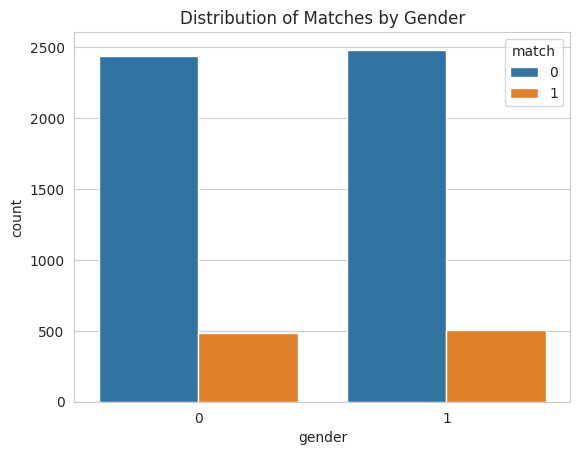

In [193]:
#Distribution of Matches by Gender
sns.countplot(data=df, hue="match", x="gender")
plt.title('Distribution of Matches by Gender')
plt.show()


The count plot reveals that, across both genders, there are more instances of unmatched individuals compared to matched individuals.

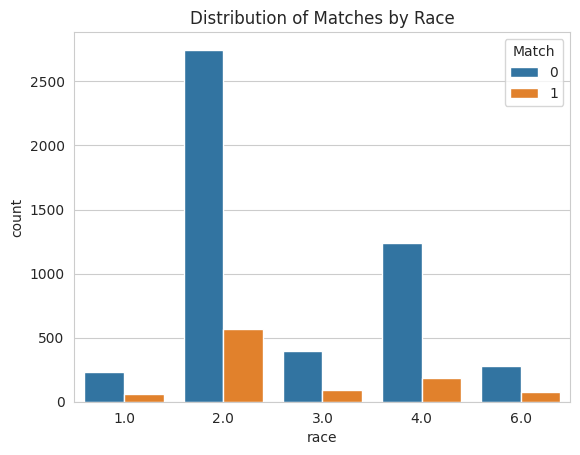

In [194]:
# Create the count plot to visualize match distribution by race

sns.countplot(data=df, hue="match", x="race")
plt.title('Distribution of Matches by Race')
plt.legend(title='Match', loc='upper right')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


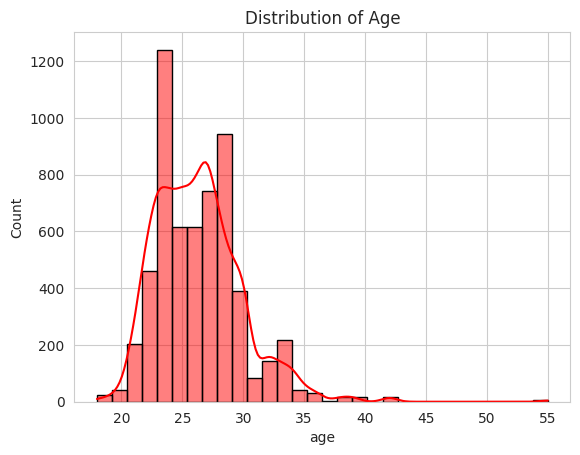

In [195]:
# Create the histogram plot for age distribution
sns.set_style("whitegrid")
sns.histplot(data=df, x='age', bins=30, kde=True, color='red', edgecolor='black')
plt.title('Distribution of Age')
plt.show()

The age distribution is positively skewed, indicating a higher concentration towards younger individuals, which is commonly expected.

then let's divid the train dataset into features and target

In [196]:
y = df['match'] 
X = df.drop('match', axis=1)  # Drop the target column from the dataset

In [197]:
# Identifying numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Modeling 
**trial 1**

In [198]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [199]:
# Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values using simple imputer
    ('scaler', MinMaxScaler())               # normalize the data
])

In [200]:
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with the most frequent category
    ('encoder', OneHotEncoder())                         # Apply one hot encoding
])

In [201]:
# Combining preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [202]:
# Create the full pipeline with RandomForestClassifier as the model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42,n_estimators=100, max_depth=10))  
])

In [213]:
# Fit the pipeline on the training data
model_pipeline.fit(X_train, y_train)

# Predict probabilities for the positive class with the test data
pred_probs = model_pipeline.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, pred_probs)
print(f"ROC AUC Score: {roc_auc:.4f}")

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC AUC Score: 0.8754


In [214]:
# Convert predicted probabilities to class predictions
threshold = 0.5
y_pred = (pred_probs >= threshold).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[974  29]
 [124  55]]


In [204]:
_id=df2['id']

pred_test = model_pipeline.predict_proba(df2)[:, 1]

pred_df = pd.DataFrame(data={'ID': np.asarray(_id), 'match': pred_test})

pred_df.to_csv('submission1.csv', index=False)
pred_df

,ID,match
0,934,0.108299
1,6539,0.258498
2,6757,0.180261
3,2275,0.066732
4,1052,0.135631
...,...,...
2464,7982,0.165848
2465,7299,0.407546
2466,1818,0.064810
2467,937,0.136986


this trail give me score 85% on leader board😥 let's try to improve our accuracy💪

**trail 2** 

in this trail i will use another imputers,scaler,encoder and another model

In [205]:
# Preprocessing for numerical data
numeric = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),  # Impute missing values using KNNImputer
    ('scaler', MinMaxScaler())               # Normalize the data
])

# Preprocessing for categorical data
# Using OrdinalEncoder for encoding categorical features
categorical = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),  # Fill missing values with the most frequent category
    ('encoder', OrdinalEncoder())                         # Apply ordinal encoding
])

# Combining preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric, numeric_features),
    ('cat', categorical, categorical_features)
])

# Create the full pipeline with LogisticRegression as the model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000)) 
])

# Fit the pipeline on the training data
model_pipeline.fit(X_train, y_train)

# Predict probabilities for the positive class with the test data
pred_probs = model_pipeline.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, pred_probs)
print(f"ROC AUC Score: {roc_auc:.4f}")

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC AUC Score: 0.8754


In [212]:
# Convert predicted probabilities to class predictions
threshold = 0.5
y_pred = (pred_probs >= threshold).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[974  29]
 [124  55]]


In [206]:
_id=df2['id']

pred_test = model_pipeline.predict_proba(df2)[:, 1]

pred_df = pd.DataFrame(data={'ID': np.asarray(_id), 'match': pred_test})

pred_df.to_csv('submission2.csv', index=False)

the score is better than after and give me better score on leaderboard but we have to make it better

**trail 3**

in this trail i will try xgboost but with different estimator and depth range.

In [ ]:
# divid the data into numeric and categorical featuers
features_numeric = list(X_train.select_dtypes(include=['float64', 'int64']))

features_categorical = list(X_train.select_dtypes(include=['category']))

In [ ]:

np.random.seed(0)

# define a pipe line for numeric feature preprocessing

transformer_numeric = Pipeline(
                                    steps=[
                                        ('imputer', SimpleImputer()),
                                        ('scaler', StandardScaler())]
                                )


# define a pipe line for categorical feature preprocessing
transformer_categorical = Pipeline(
                                    steps=[
                                        ('imputer', SimpleImputer(strategy='most_frequent')),
                                        ('onehot', OneHotEncoder(handle_unknown='ignore'))
                                    ]
                                )

# define the preprocessor 
preprocessor = ColumnTransformer(
                                    transformers=[
                                        ('num', transformer_numeric, features_numeric),
                                        ('cat', transformer_categorical, features_categorical)
                                    ]
                                )

# combine the preprocessor with the model as a full tunable pipeline
full_pipline = Pipeline(
                        steps=[
                            ('preprocessor', preprocessor),
                            ('my_classifier',XGBClassifier(objective='binary:logistic', seed=0),
                            )
                        ]
)
full_pipline

In [ ]:
param_grid = {
                'preprocessor__num__imputer__strategy': ['mean','median'],
                
                'my_classifier__n_estimators': [20, 30, 40],

                'my_classifier__max_depth':[10, 20, 30]
            }



grid_search = GridSearchCV(
                            full_pipline, param_grid, cv=4, verbose=1, n_jobs=2, scoring='roc_auc')


grid_search.fit(X_train, y_train)
print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

In [ ]:
_id=df2['id']

pred_test = grid_search.predict_proba(df2)[:, 1]

pred_df = pd.DataFrame(data={'ID': np.asarray(_id), 'match': pred_test})

pred_df.to_csv('submission3.csv', index=False)

are you kidding😂 this gives me the worest score ever😂💔 let's try again

**trail 4** 

in this trail i will try different parameters using random search

In [ ]:
param_rand = {
    'preprocessor__num__imputer__strategy': ['mean', 'median', 'most_frequent'],  # Imputer strategy options

    'my_classifier__n_estimators': [50, 100, 200],  # Number of boosting rounds

    'my_classifier__max_depth': [5, 10, 15],  # Maximum depth of each tree
    'my_classifier__subsample': [0.6, 0.8, 1.0],  # Subsample ratio of the training instances
    'my_classifier__colsample_bytree': [0.5, 0.7, 1.0],  # Subsample ratio of columns when constructing each tree
    'my_classifier__learning_rate': [0.01, 0.1],  # Learning rate
}




rand_search = RandomizedSearchCV(full_pipline, param_rand, cv=5, verbose=1, n_jobs=2,# number of random trials
    n_iter=3,
    scoring='roc_auc')

rand_search.fit(X_train, y_train)

print('best score {}'.format(rand_search.best_score_))
print('best score {}'.format(rand_search.best_params_))

In [ ]:
_id=df2['id']

pred_test = rand_search.predict_proba(df2)[:, 1]

pred_df = pd.DataFrame(data={'ID': np.asarray(_id), 'match': pred_test})

pred_df.to_csv('submission4.csv', index=False)

not bad

**trail 5**

in this trail i will use BayesSearch with only numerical featuers

In [ ]:
from skopt import BayesSearchCV

In [ ]:

# Assuming you have already defined features_numeric, X_train, and y_train

# Define the parameter bayes
param_bayse = {
    'preprocessor__impute_and_clean_numerical__imputer__strategy': ['mean', 'median', 'most_frequent'],  # Imputer strategy options
    'XGBoost__n_estimators': [50, 100, 200],  # Number of boosting rounds
    'XGBoost__max_depth': [5, 10, 15],  # Maximum depth of each tree
    'XGBoost__subsample': [0.6, 0.8, 1.0],  # Subsample ratio of the training instances
    'XGBoost__colsample_bytree': [0.5, 0.7, 1.0],  # Subsample ratio of columns when constructing each tree
    'XGBoost__learning_rate': [0.01, 0.1],  # Learning rate
}

# Define the numerical preprocessing pipeline
impute_and_clean_numerical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())]
)

# Define the preprocessing column transformer
preprocessing = ColumnTransformer(transformers=[
    ('impute_and_clean_numerical', impute_and_clean_numerical, features_numeric)
])

# Define the XGBoost pipeline
xgboost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessing),
    ('XGBoost', XGBClassifier(objective='binary:logistic', seed=0))
])
# use stratified k fold as the dataset is not balanced.
kfolds=StratifiedKFold(5)

# Perform Bayesian search
bayesian_search = BayesSearchCV(xgboost_pipeline, param_bayse, cv=kfolds, n_iter=10, verbose=2, n_jobs=4, scoring='roc_auc')
bayesian_search.fit(X_train, y_train)

# To show the best score and hyperparameters
print('The Best Score:', bayesian_search.best_score_)
print('The Best Hyperparameters:', bayesian_search.best_params_)


In [ ]:
_id=df2['id']

pred_test = bayesian_search.predict_proba(df2)[:, 1]

pred_df = pd.DataFrame(data={'ID': np.asarray(_id), 'match': pred_test})

pred_df.to_csv('submission5.csv', index=False)

here we go 💪 this trail give me scor 88.2 on leaderboard

**trai 6**

in this one i will try to dealing with the problem of class imbalance in the dataset, our goal is to achieve a sample distribution that is more balanced and representative

In [ ]:
from imblearn.over_sampling import RandomOverSampler
#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority")

# Split the features from the label
X = df.drop('match', axis=1)
y = df['match']

# Resample the data
X_res, y_res = rus.fit_resample(X, y)

In [215]:
# trying to handle the imbalanced data
bayesian_search = BayesSearchCV(xgboost_pipeline, param_bayse, cv=kfolds, n_iter=10, verbose=2, n_jobs=4, scoring='roc_auc')
# fitting the grid search
bayesian_search.fit(X_res, y_res )

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/opt/conda/lib/python3.10/site-packages/skopt/space/space.py:110: UserWarning: Dimension [0.01, 0.1] was inferred to Real(low=0.01, high=0.1, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(0.01, 0.1), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skopt/space/space.py:110: UserWarning: Dimension [0.01, 0.1] was inferred to Real(low=0.01, high=0.1, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(0.01, 0.1), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skopt/space/space.py:110: UserWarning: Dimension [0.01, 0.1] was inferred to Real(low=0.01, high=0.1, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, i

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
best score 0.8673288749016522
best score {'my_classifier__max_depth': 20, 'my_classifier__n_estimators': 40, 'preprocessor__num__imputer__strategy': 'median'}
[CV] END XGBoost__colsample_bytree=1.0, XGBoost__learning_rate=0.050587646615136046, XGBoost__max_depth=15, XGBoost__n_estimators=200, XGBoost__subsample=0.6, preprocessor__impute_and_clean_numerical__imputer__strategy=most_frequent; total time=   2.4s
[CV] END XGBoost__colsample_bytree=0.7, XGBoost__learning

In [ ]:
_id=df2['id']

pred_test = grid_search.predict_proba(df2)[:, 1]

pred_df = pd.DataFrame(data={'ID': np.asarray(_id), 'match': pred_test})

pred_df.to_csv('submission7.csv', index=False)

# Define the problem:

**The problem involves a dataset that contains information about a particular dating session, and our objective is to determine whether or not this session will result in a match. To put it another way, we need to determine whether two people's profiles will match.**

# what is the input?

**The dataset we have includes 191 features that store details on the dating session as well as individual participant information, including interest, education, and demographic data.**

# what is the output?

**Given that this is a binary classification problem, the output, which we may interpret as the likelihood of a match, will be a number between 0 and 1. instead, we can use a threshold to determine whether the output matches or doesn't.**

# what is the mining function required ?

**The binary classification function, which is the mining function employed in this challenge, was achieved by taking the following actions:**

**gather the data** : we have the data

**data cleaning**: handling incorrectly structured data, handling null values,Remove any columns that have a constant value, deal with inconsistent columns, look for outliers, and look for relationships.

**data pre processing**: I utilized the usual scaler for the numerical column's data preprocessing and the one-hot encoding and oridinal encoding  method for the categorical column. Both operations were carried out inside the machine learning pipeline.

**modeling** :Using grid search, random search, and bayesian search, attempt various models with varying hyperparameters and features after defining the task as a classification problem and determining the evaluation metric—in our instance, AUC.

**model evalutaion** choosing the best model by comparing the best scoring metric.

# what are the challenges?

The dataset contains many incomplete candidate profiles, leading to a high amount of missing data. The categorical features, especially in the "from" column, have a vast number of unique values. We must address this issue or establish solid criteria for handling it, as the numerous characteristics will affect training time significantly. Choosing the best model involved training multiple models, but ultimately, I settled on xgboost and random forest due to its exceptional performance. To fine-tune the model, one must select the hyperparameter range while understanding that the process of grid and Bayesian search may take some time to find the optimal model within the parameter space.

# what is the impact ?

Dating apps are all the rage nowadays, with people spending most of their time online. By addressing this issue, we can easily develop a recommendation system to connect two individuals who are highly compatible.

# what is the ideal solution?

The ideal situation would involve having an endless number of records. Unfortunately, our dataset had its challenges with inconsistent labeling and missing data, leading to overfitting on the dominant class. To address this overfitting problem, it is crucial to gather more data. Despite this issue, achieving a roc_auc of 0.88 is still preferable to having no data at all. While we may struggle to identify matches compared to non-matches, this limitation can actually be beneficial in practice. By eliminating users who do not match from the list, it increases the chances of finding a match.

# Answer the questions

**Q1) Why a simple linear regression model (without any activation function) is not good for classification task, compared to Perceptron/Logistic regression?**

Linear regression is used to solve problems involving continuous dependent variables, identified using a given set of individual variables. On the other hand, logistic regression is used for classifying data into predefined classes, where the output is discrete. In essence, linear regression is for regression and logistic regression is for classification. This is due to the threshold shift problem that occurs when adding points to the data, as the output of the perceptron can be easily converted to a discrete value using a threshold of 0.5 for sigmoid.

# Q2) What's a decision tree and how it is different to a logistic regression model?

Decision Trees are a type of machine learning algorithm used for making decisions in classification and regression tasks. The main objective is to build a model that can predict the outcome of a target variable by studying the data patterns and deriving simple rules. Essentially, the decision tree breaks down the data into smaller segments to make accurate predictions.

**the difference between them:**

Decision trees divide the space into small portions, whereas logistic regression fits a single line to separate the space into two distinct regions. Decision trees are better equipped to handle imbalanced classes compared to logistic regression, and they are also capable of working with missing values - a task that logistic regression fails to accomplish. While logistic regression is seen as a linear classifier, decision trees are considered non-linear classifiers. Additionally, decision trees are interpretable, providing insights into why a particular value was predicted, whereas logistic regression is simply an equation.

# Q3)What's the difference between grid search and random search?

Grid Search is a thorough search method that chooses the optimal combination by trying out all possible hyper-parameter values and evaluating them using cross-validation scores. On the other hand, Random search involves randomly selecting values from a specified range, which helps in avoiding searching through the entire parameter space. While it is good for testing a wide range of values and quickly finding a great combination, it may not always give the best parameter combination. Although Grid Search can be time-consuming, it ultimately provides the best combination.

# Q4) what is the difference between random search and bayesian search?

When optimizing hyperparameters in machine learning models, Random Search and Bayesian Search are two common methods used. Random Search involves randomly selecting hyperparameter combinations from a set search space.

While this method can efficiently explore a wide range of possibilities, it lacks a systematic approach to selecting combinations, making it difficult to determine if there are better options. 

In contrast, Bayesian Search uses Bayesian principles to guide the search process. It takes into account prior knowledge about the hyperparameters and the likelihood of observing certain outcomes with those hyperparameters. 

By incorporating this information, Bayesian Search is able to focus on finding the most optimal hyperparameter combinations.